In [68]:
import csv
import os
import numpy as np
import pandas as pd
from metrics import *


def evaluate(predict_path, answer_path, sort_by_col=None, average=False, is_target_with_header=False, is_ranked_list_with_header=False, ranked_list_cols=None, debug=False):
    """
    Parameters:
    ----------
    predict_path: path for predictions in csv format
    answer_path:  path for answer in csv format
    Format:
        prediction: n*(2+k) 2d-array
            n: number of test instances
            k: number of items recommended
            user_id, event_time, rec_1, rec_2, ... , rec_k
        answer: n*k 2d-array
            n: number of test instances
            k: columns = [user_id, ans_id,..., event_time]
    Return:
    ----------
    Dictionary: 
        type(key): str,
        type(value): float/[float]
        if average == True:
            {'hr':score,'mrr':score,'ndcg':score}
        else #average == False:
            {'hr':[score...],'mrr':[score...],'ndcg':[score...]}
    """
    
    df_pre = pd.read_csv(predict_path, header=None)
    df_ans = pd.read_csv(answer_path, header=None)
    if debug:
        print("answer info:",df_ans.shape,'\n')
        print(df_ans.head(3))
        print("\n------\n")
        print("prediction info:",df_pre.shape,'\n')
        print(df_pre.head(3))

    # drop [user_id, event_time]
    if is_target_with_header:
        targets = df_ans.loc[1:,:] # drop header
    else:
        targets = df_ans.loc[:,:] # retain header
    
    if is_ranked_list_with_header:
        ranked_lists = df_pre.loc[1,:] # drop header
    else:
        ranked_lists = df_pre.loc[:,:] # drop header

    if sort_by_col == None:
        targets = targets.loc[:,1]
    else:
        targets.sort_values(by=sort_by_col,inplace=True)
        ranked_lists.sort_values(by=sort_by_col,inplace=True)
        if debug:
            print("\n====================================================\n")
            print("check sorting result")
            print("target (first, last):",targets.head(1)[sort_by_col].values[0],targets.tail(1)[sort_by_col].values[0])
            print("predict (first, last):",ranked_lists.head(1)[sort_by_col].values[0],ranked_lists.tail(1)[sort_by_col].values[0])
        targets = targets.loc[:,1]
        
    if ranked_list_cols:
        ranked_lists = ranked_lists.loc[:,ranked_list_cols]  # choose columns of ranked items

    targets = targets.values.astype(int) # convert dataFrame to list
    ranked_lists = ranked_lists.values.astype(int)
    if debug:
        print("\n====================================================\n")
        print("targets info:",targets.shape,targets.dtype,'\n')
        print(targets[:3])
        print("\n------\n")
        print("\nranked_lists info:",ranked_lists.shape,ranked_lists.dtype,'\n')
        print(ranked_lists[:3])

    # get scores of list/average
    hr = get_hit_ratio(ranked_lists,targets,average)
    mrr = get_MRR(ranked_lists,targets,average)
    ndcg = get_NDCG(ranked_lists,targets,average)
    return {'hr':hr,'mrr':mrr,'ndcg':ndcg}

## movielens offline dim=10

In [70]:
data_dir = 'data'
prediction_dir =  os.path.join(data_dir,'prediction')
answer_dir = os.path.join(data_dir,'movielens')
task = 'iRCD'
##
prediction_file_name = 'predict_movielens_offline_10.csv'
answer_file_name = 'movielens_offline_test.csv'
##
predict_path = os.path.join(prediction_dir,task,prediction_file_name)
answer_path  = os.path.join(answer_dir,answer_file_name)


score_list = evaluate(predict_path=predict_path,
                      answer_path=answer_path,
                      sort_by_col=0,
                      average=True,
                      is_target_with_header=False,
                      is_ranked_list_with_header=False,
                      debug=False,
                      ranked_list_cols=list(range(2,100)))


In [71]:
score_list

{'hr': 0.0, 'mrr': 0.0, 'ndcg': 0.0}

## movielens offline dim=100

In [13]:
data_dir = 'data'
prediction_dir =  os.path.join(data_dir,'prediction')
answer_dir = os.path.join(data_dir,'movielens')
task = 'iRCD'
##
prediction_file_name = 'predict_movielens_offline_100.csv'
answer_file_name = 'movielens_offline_test.csv'
##
predict_path = os.path.join(prediction_dir,task,prediction_file_name)
answer_path  = os.path.join(answer_dir,answer_file_name)

scores = evaluate(predict_path=predict_path,
                  answer_path=answer_path,
                  sort=True,
                  average=True,
                  is_target_with_header=False,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [14]:
scores

{'hr': 0.0, 'mrr': 0.0, 'ndcg': 0.0}

## movielens online dim=10

In [15]:
data_dir = 'data'
prediction_dir =  os.path.join(data_dir,'prediction')
answer_dir = os.path.join(data_dir,'movielens')
task = 'iRCD'
##
prediction_file_name = 'predict_movielens_online_10.csv'
answer_file_name = 'movielens_online_test.csv'
##
predict_path = os.path.join(prediction_dir,task,prediction_file_name)
answer_path  = os.path.join(answer_dir,answer_file_name)

scores = evaluate(predict_path=predict_path,
                  answer_path=answer_path,
                  sort=False,
                  average=True,
                  is_target_with_header=False,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [16]:
scores

{'hr': 0.0, 'mrr': 0.0, 'ndcg': 0.0}

## movielens online dim=100

In [31]:
data_dir = 'data'
prediction_dir =  os.path.join(data_dir,'prediction')
answer_dir = os.path.join(data_dir,'movielens')
task = 'iRCD'
##
prediction_file_name = 'predict_movielens_online_10.csv'
answer_file_name = 'movielens_online_test.csv'
##
predict_path = os.path.join(prediction_dir,task,prediction_file_name)
answer_path  = os.path.join(answer_dir,answer_file_name)

scores = evaluate(predict_path=predict_path,
                  answer_path=answer_path,
                  sort=False,
                  average=True,
                  is_target_with_header=False,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

scores = evaluate(predict_path='./predictions/predict_movielens_online_100.csv',
                  answer_path='../data/movielens/movielens_offline_test.csv',
                  sort=False,
                  average=True,
                  is_target_with_header=False,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [32]:
scores

{'hr': 0.006557377049180328, 'mrr': 0.0005044928975356805, 'ndcg': 0.0}

## yelp offline dim=10

In [ ]:
scores = evaluate(predict_path='./predictions/predict_yelp_offline_10.csv',
                  answer_path='../data/yelp/yelp_offline_test.csv',
                  sort=False,
                  average=True,
                  is_target_with_header=True,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [ ]:
scores

## yelp offline dim=100

In [36]:
scores = evaluate(predict_path='./predictions/predict_yelp_offline_100.csv',
                  answer_path='../data/yelp/yelp_offline_test.csv',
                  sort=False,
                  average=True,
                  is_target_with_header=True,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [37]:
scores

{'hr': 0.0015128095504324663, 'mrr': 3.562261743243075e-05, 'ndcg': 0.0}

## yelp online dim=10

In [ ]:
scores = evaluate(predict_path='./predictions/predict_yelp_online_100.csv',
                  answer_path='yelp_online_test.csv',
                  sort=False,
                  average=True,
                  is_target_with_header=True,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [ ]:
scores

## yelp online dim=100

In [ ]:
scores = evaluate(predict_path='./predictions/predict_yelp_online_100.csv',
                  answer_path='yelp_online_test.csv',
                  sort=False,
                  average=True,
                  is_target_with_header=True,
                  is_ranked_list_with_header=False,
                  ranked_list_cols=list(range(2,102)))

In [ ]:
scores

# plot

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
def plot_result(score_list,bin_size=None,bin_count=None):
    L = len(score_list)
    if not bin_size:
        bin_size = L//100
    if not bin_count:
        bin_count = L//1000
    py = [np.mean(score_list[i:i+bin_size]) for i in range(0,L,bin_count)]
    plt.plot(range(len(py)),py)
    plt.show()


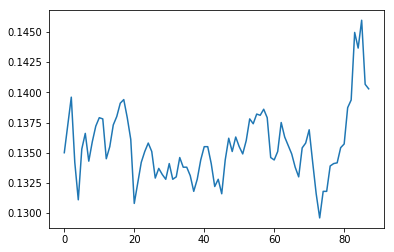

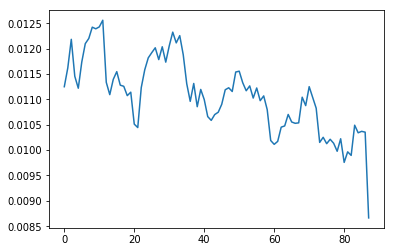

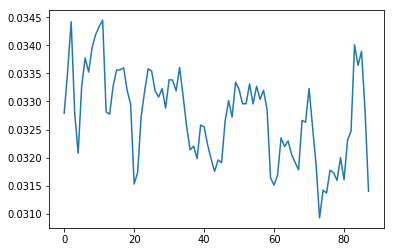

In [83]:
plotResult(score_list['hr'],bin_size=10000, bin_count=1000)
plotResult(score_list['mrr'],bin_size=10000, bin_count=1000)
plotResult(score_list['ndcg'],bin_size=10000, bin_count=1000)